# Plotting Employee Resignations Across Several Variables

In this project, we are going to work with exit surveys from former employees of the Department of Education, Training and Employment (DETE) and of the Technical and Further Education (TAFE) institute in Queensland, Australia.

Our goal, under the role of data analyst, is to determine reasons why employees who worked for these institutes for short periods of time resign, compared to employees who worked there longer. Additionally, we want to investigate why younger employees resign, compared to older employees.

The website hosting the documenation for the TAFE data set can no longer be found, but the documentation for the DETE data set can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).
## Introduction

First, we'll read and explore the datasets.

In [1]:
# Read in the data

import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

pd.options.mode.chained_assignment = None  # default = 'warn'
pd.options.display.max_columns = 150 # to avoid truncated output

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

We can make the following observations about the DETE dataset based on the work above:

- Columns that are date-related are type object. 
- Age is of type object. 
- There is a 'none of the above' column that may affect our data.
- The IDs start at 1 and increase accordingly.
- There are different employment ending reasons included in the data set.

## Identifying Missing Values and Dropping Unnecessary Columns

Let's take a look at what columns have missing values.

In [4]:
# Checking for missing values
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Nearly half of the columns have null values.

There are a number of columns we won't need for this analysis, so let's drop them.

In [5]:
# Removing unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [6]:
# TAFE survey exploration
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

We can make the following observations about the TAFE dataset based on the work above:
- Cessation year column is of type float. 
- Many of the object columns could be bool columns instead.

In [8]:
# Checking for missing values
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

Quite a few null values as well.

There are a number of columns in `tafe_survey` that we won't use either. Let's drop those.

In [9]:
# Removing unnecessary columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

## Renaming Columns
We will want to standardize the columns as we will eventually combine the dataframes.

In [47]:
# Cleaning the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Checking the columns were cleaned properly
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [48]:
# Matching the TAFE column names to match the DETE column names
tafe_survey_updated = tafe_survey_updated.rename(columns = {'Record ID' : 'id', 'CESSATION YEAR' : 'cease_date',
                                                 'Reason for ceasing employment' : 'separationtype',
                                                 'Gender. What is your Gender?' : 'gender',
                                                 'CurrentAge. Current Age' : 'age',
                                                 'Employment Type. Employment Type' : 'employment_status',
                                                 'Classification. Classification' : 'position',
                                                 'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'institute_service',
                                                 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

# Checking the columns were renamed properly
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filtering the Data

We only care about resignations, so we'll isolate the rows with employees stating their separation from the company was a resignation.

In [50]:
# Checking types of separation from DETE
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [49]:
# Checking types of separation from TAFE
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [15]:
# Filtering only resignations
dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].isin(['Resignation-Other reasons',
                                                            'Resignation-Other employer',
                                                            'Resignation-Move overseas/interstate'])]

In [17]:
# Filtering only resignations
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']



We're going to check `cease_date` and `dete_start_date` columns for logical inconsistencies. `cease_date` is the last year of the employee's employment, and `dete_start_date` contains the first year of their employment--we will see if there are rows where the first year is after the last year or the last year is before the first year.

In [19]:
# Checking unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [20]:
# Removing the months
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)

# Verifying the cleaned unique values
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [21]:
# Checking unique values 
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

None of the values appear out of the ordinary within their own columns.

## Creating New Columns

`tafe_resignations` has `institute_service` to denote the years of service for each employee, while `dete_resignations` does not. Let's create a column for it to ease the process of linking the two data frames together.

In [52]:
# Creating a new column indicating the length of time an employee spent in DETE
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Checking the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Next, we will create a column that indicates whether an employee indicated a factor that caused them to resign by marking them as `dissatisfied`.

In [24]:
# Checking unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [25]:
# Checking unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [26]:
# Making a function that updates the values in the contributing factors columns to be either True, False, or NaN
def update_vals(val): 
    if pd.isnull(val) == True:
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [27]:
# Applying update_vals to the contributing factors columns
tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                                                      'Contributing Factors. Job Dissatisfaction']].copy().applymap(update_vals)

# Checking the result
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]

In [29]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)

tafe_resignations_copy = tafe_resignations.copy()

In [54]:
# Updating the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                         'dissatisfaction_with_the_department',
                                                         'physical_work_environment',
                                                         'lack_of_recognition',
                                                         'lack_of_job_security',
                                                         'work_location',
                                                         'employment_conditions',
                                                         'work_life_balance',
                                                         'workload']].any(axis = 1, skipna = False)

dete_resignations_copy = dete_resignations.copy()
dete_resignations_copy['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

To differentiate between the DETE and TAFE institutes, we'll add an institute column prior to combining the datasets. Afterward, we'll drop any unnecessary columns.

In [55]:
# Adding an institute column
dete_resignations_copy['institute'] = 'DETE'
tafe_resignations_copy['institute'] = 'TAFE'

# Combining the DETE and TAFE datasets
combined = pd.concat([dete_resignations_copy, tafe_resignations_copy])

# Dropping columns with more than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis = 1)

# Checking the number null values in each column
combined_updated.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          8
institute             0
dtype: int64

There are 8 NaN values in the `dissatisfied` column. We can just replace those with `False` as the previous dissatisfaction-related columns had not been reported to be `True`. 

In [63]:
# Replacing NaN values with False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# Checking the result
combined_updated['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

Now that we fixed the `dissatisfied` column, let's check the `institute_service` column.

In [64]:
# Checking unique values
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


These are awkward numbers. Let's convert them into categories with the following definitions:
- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 6-10 years in the workplace
- Veteran: 11+ years in the workplace

In [65]:
# Extracting the years of service, converting their type to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.replace('Less than', '').str.replace('More than', '').str.replace('year', '').str.replace('s', '').str.replace('-','.').astype('float')

# Checking the result
combined_updated['institute_service'].value_counts()

1.0     95
1.2     64
3.4     63
5.6     33
11.2    26
5.0     23
7.1     21
3.0     20
0.0     20
20.0    17
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
8.0      8
13.0     8
15.0     7
22.0     6
14.0     6
12.0     6
17.0     6
10.0     6
18.0     5
16.0     5
23.0     4
24.0     4
11.0     4
32.0     3
19.0     3
21.0     3
39.0     3
36.0     2
26.0     2
28.0     2
25.0     2
30.0     2
31.0     1
34.0     1
41.0     1
49.0     1
42.0     1
35.0     1
38.0     1
33.0     1
27.0     1
29.0     1
Name: institute_service, dtype: int64

In [36]:
def categorize(year):
    if year < 3.0:
        return 'New'
    elif year < 6.0:
        return 'Experienced'
    elif year <= 10.0:
        return 'Established'
    elif year > 10.0:
        return 'Veteran'
    elif pd.isnull(year) == True:
        return 'Unknown'

In [66]:
# Converting years of service to their respective categories
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)

# Checking the result
combined_updated['service_cat'].value_counts()

New            193
Experienced    155
Veteran        136
Unknown         88
Established     79
Name: service_cat, dtype: int64

Let's check for any more null values that we should clean up.

In [67]:
# Checking null values of each column
combined_updated.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          0
institute             0
service_cat           0
dtype: int64

Rows with a missing `cease_date` are probably still working for the institute they are at, so we will drop those rows.

In [40]:
# Dropping `cease_date` from the dataset
combined_updated = combined_updated.dropna(subset = ['cease_date'])

We don't have many ways we could adjust the null values in the other columns. We will ignore them in our analysis. For now, let's take a look at the `age` column.

In [68]:
# Checking unique values
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The `age` column had different formatting between DETE and TAFE employees. Let's standardize this column.

In [42]:
# Making all the ranges have dashes
combined_updated['age'] = combined_updated['age'].str.replace('  ', '-')
combined_updated['age'] = combined_updated['age'].str.replace('56 or older', '56-60')

# Checking the result
combined_updated['age'].value_counts()

41-45            90
46-50            78
36-40            70
51-55            70
26-30            67
31-35            61
21-25            61
56-60            54
61 or older      22
20 or younger    10
Name: age, dtype: int64

## Performing Some Analysis

We're ready to calculate the percentage of employees who resigned due to some sort of dissatisfaction across several variables. This analysis is not final due to having missing values to handle.

Text(0.5, 1.0, 'Proportion Dissatisfied by Service Category')

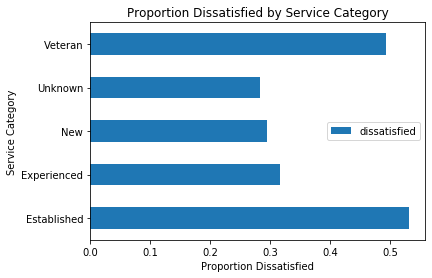

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

# Calculating the percentage of employees due to dissatisfaction in each service category
combined_updated_pt = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')

# Plotting the results
combined_updated_pt.plot(kind = 'barh')
plt.xlabel('Proportion Dissatisfied')
plt.ylabel('Service Category')
plt.title('Proportion Dissatisfied by Service Category')

It seems the more service an employee has done for DETE or TAFE, the more likely they are to resign due to some sort of dissatisfaction with their job. Let's examine dissatisfaction proportions with regards to age.

Text(0.5, 1.0, 'Proportion Dissatisfied by Age')

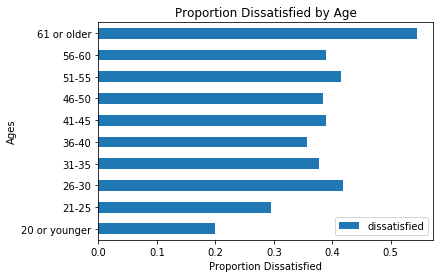

In [44]:
# Calculating the percentage of employees due to dissatisfaction in each age category
combined_updated_pt = combined_updated.pivot_table(index = 'age', values = 'dissatisfied')

# Plotting the results
combined_updated_pt.dropna().plot(kind = 'barh')
plt.xlabel('Proportion Dissatisfied')
plt.ylabel('Ages')
plt.title('Proportion Dissatisfied by Age')

Generally, employees that are 25 or younger are less likely to experience some sort of dissatisfaction and subsequently resign than employees that are 26 and older. In employees that are 61 or older, this effect is especially pronounced. Let's see this dissatisfaction distribution between male and female employees.

Female    413
Male      166
Name: gender, dtype: int64


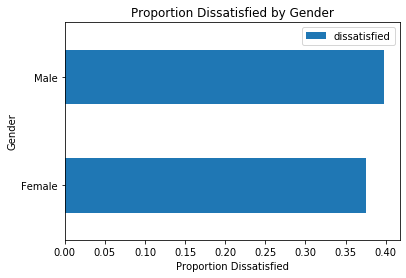

In [45]:
# Calculating the percentage of employees due to dissatisfaction between male and female employees
combined_updated_pt = combined_updated.pivot_table(index = 'gender', values = 'dissatisfied')

# Plotting the results
combined_updated_pt.dropna().plot(kind = 'barh')
plt.xlabel('Proportion Dissatisfied')
plt.ylabel('Gender')
plt.title('Proportion Dissatisfied by Gender')

# Printing the number of male and female employees
print(combined_updated['gender'].value_counts())

Despite female employees heavily outnumbering male employees between DETE and TAFE, male employees have a greater likelihood of experiencing some sort of dissatisfaction and subsequently resigning. Let's see the dissatisfaction difference between DETE and TAFE.

Text(0.5, 1.0, 'Proportion Dissatisfied by Institute')

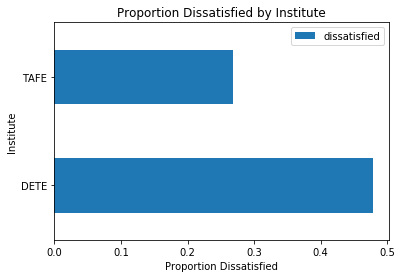

In [69]:
# Calculating the percentage of employees due to dissatisfaction between institutes
combined_updated_pt = combined_updated.pivot_table(index = 'institute', values = 'dissatisfied')

# Plotting the results
combined_updated_pt.dropna().plot(kind = 'barh')
plt.xlabel('Proportion Dissatisfied')
plt.ylabel('Institute')
plt.title('Proportion Dissatisfied by Institute')

It appears that DETE employees are almost twice as likely to resign due to some sort of dissatisfaction, compared to TAFE employees.

## Conclusion

We cleaned the data and combined the TAFE and DETE datasets. We found that the more years of service an employee has with TAFE or DETE, the more likely they are to resign with some sort of job dissatisfaction. If an employee was 25 or younger, they were less likely to resign compared to their older counterparts. Employees that were 61 or older were most likely to resign, amongst all the age groups. 

We found male employees to be more likely to resign than female employees at DETE and TAFE. We also found that employees at DETE were almost twice as likely to resign due to some sort of dissatisfaction, compared to TAFE employees.